In [1]:
import numpy as np
import pandas as pd
#import yfinance as fyf
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller #тест Дики-Фуллера
from statsmodels.tsa.stattools import arma_order_select_ic as seic #функция подбора ARMA
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

**НЕ ОБРАЩАЕМ ВНИМАНИЕ НА РЕЗУЛЬТАТ ОЦЕНКИ АРМА-модели, и делаем все для АРМА 4,2. Решаем модель 4,2.**

In [2]:
#import yfinance as fyf
#stocks='AMZN DIS GOOG NFLX GLD INTC AAPL'
#stocks=stocks.split()
#data=fyf.download(stocks,'2017-06-01')['Close']
#data.tail()

In [3]:
#stocks= data.INTC
#data=fyf.download(stocks,'2010-01-01')['Close']
#stocks.tail()

In [4]:
st=pd.read_excel('arma42.xlsx')
st.head(5)

,value1,value2
0,0.066046,0.041027
1,0.035875,0.070397
2,-0.042130,0.016500
3,0.016834,0.004594
4,0.044333,-0.033387


In [5]:
stocks=st.value1
stocks.head(5)

0    0.066046
1    0.035875
2   -0.042130
3    0.016834
4    0.044333
Name: value1, dtype: float64

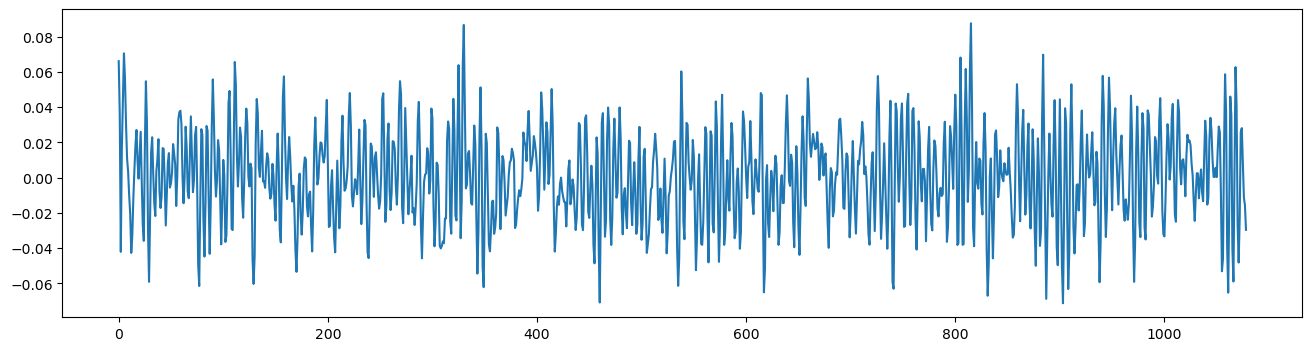

1079

In [6]:
dldiff = stocks
plt.rcParams["figure.figsize"] = (16,4) 
plt.plot(dldiff)
plt.show()
length=len(dldiff)
length

In [7]:
from statsmodels.tsa.stattools import arma_order_select_ic
ARMA_order = arma_order_select_ic(dldiff,max_ar=4,max_ma=3,ic='aic')
ARMA_order

{'aic':              0            1            2            3
 0 -4795.421021 -5533.081144 -5978.482518 -6029.695412
 1 -5143.775367 -5639.858169 -5984.475124 -6011.603218
 2 -6008.976154 -6129.723269 -6385.641685 -6385.050814
 3 -6252.685243 -6268.586095 -6381.250996 -6396.383939
 4 -6315.850516 -6389.103567 -6407.491012 -6414.948670,
 'aic_min_order': (4, 3)}

In [8]:
stocks.size

1079

In [9]:
model=ARIMA(dldiff, order=(4,0,2))
mf = model.fit()
mf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 value1   No. Observations:                 1079
Model:                 ARIMA(4, 0, 2)   Log Likelihood                3211.746
Date:                Fri, 12 Jan 2024   AIC                          -6407.491
Time:                        18:07:09   BIC                          -6367.621
Sample:                             0   HQIC                         -6392.394
                               - 1079                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.668      0.504      -0.001       0.003
ar.L1          0.4668      0.047     10.030      0.000       0.376       0.558
ar.L2         -0.1931      0.049     -3.923      0.000      -0.290      -0.097
ar.L3         -0.4862      0.047    -10.423      0.000      -0.578      -0.395
ar.L4          0.4176      0.044      9.597      0.000       0.332       0.503
ma.L1          0.7593      0.052     14.570      0.000       0.657       0.861
ma.L2          0.2564      0.054      4.727      0.000       0.150       0.363
sigma2         0.0002    5.6e-06     27.046      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                47.52
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.17
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
pred=mf.predict()
pred[1001:1010]

1001   -0.012305
1002    0.001484
1003    0.018949
1004    0.016346
1005    0.000932
1006   -0.014131
1007    0.020489
1008    0.040650
1009    0.014309
Name: predicted_mean, dtype: float64

In [11]:
res=mf.resid[1001:1010]
res

1001   -0.001311
1002    0.010339
1003    0.011368
1004    0.005848
1005   -0.002024
1006    0.020405
1007    0.013671
1008    0.001162
1009   -0.006393
dtype: float64

In [12]:
dl=dldiff[1001:1010]
dl

1001   -0.013617
1002    0.011823
1003    0.030317
1004    0.022194
1005   -0.001092
1006    0.006274
1007    0.034160
1008    0.041813
1009    0.007916
Name: value1, dtype: float64

In [19]:
dl[1007]

0.0341597938024791

In [13]:
#dl[0],dl[8]

In [14]:
mcf=pd.read_html(mf.summary().tables[1].as_html(),header=0,index_col=0)[0]
c=mcf['coef'].values[0]
a1=mcf['coef'].values[1]
a2=mcf['coef'].values[2]
a3=mcf['coef'].values[3]
a4=mcf['coef'].values[4]
#a5=df['coef'].values[5]
tet1=mcf['coef'].values[5]
tet2=mcf['coef'].values[6]
#tet3=mcf['coef'].values[6]
c,a1,a2,a3,a4,tet1,tet2

(0.0006, 0.4668, -0.1931, -0.4862, 0.4176, 0.7593, 0.2564)

In [15]:
prc=[]
z=c+a1*dl[1007]+a2*dl[1006]+a3*dl[1005]+a4*dl[1004]+tet1*res[1007]+tet2*res[1006]+res[1008]
z1=z
prc.append(z)
z=c+a1*dl[1008]+a2*dl[1007]+a3*dl[1006]+a4*dl[1005]+tet1*res[1008]+tet2*res[1007]
z2=z
prc.append(z)
z=c+a1*z2+a2*dl[1008]+a3*dl[1007]+a4*dl[1006]+tet2*res[1008]
z3=z
prc.append(z)
z=c+a1*z3+a2*z2+a3*dl[1008]+a4*dl[1007]
z4=z
prc.append(z)
z=c+a1*z4+a2*z3+a3*z2+a4*dl[1008]
z5=z
prc.append(z)
z=c+a1*z5+a2*z4+a3*z3+a4*z2
z6=z
prc.append(z)
prc

[0.04190759243544861,
 0.01440336054456912,
 -0.014441126066425412,
 -0.014986673952334873,
 0.0068509253776275775,
 0.019728057563380516]

In [16]:
for i in range(6):
     k=i+5
     z=c+a1*prc[k]+a2*prc[k-1]+a3*prc[k-2]+a4*prc[k-3]
     prc.append(z)
prc

[0.04190759243544861,
 0.01440336054456912,
 -0.014441126066425412,
 -0.014986673952334873,
 0.0068509253776275775,
 0.019728057563380516,
 0.009742050210452102,
 -0.008251253838347308,
 -0.011863710336997155,
 0.0001571891570204837,
 0.011044298148660573,
 0.00804753751252828]

In [17]:
pdt=[]
for i in range(1,12):
    j=1001+i
    z=dldiff[j]
    pdt.append(z)
pdt

[0.0118230515513375,
 0.0303174846046618,
 0.0221935837722327,
 -0.0010920036115375,
 0.0062737341186216,
 0.0341597938024791,
 0.0418128286204987,
 0.0079157804315297,
 -0.0209247392922205,
 -0.0250458050416203,
 0.0169166506008122]

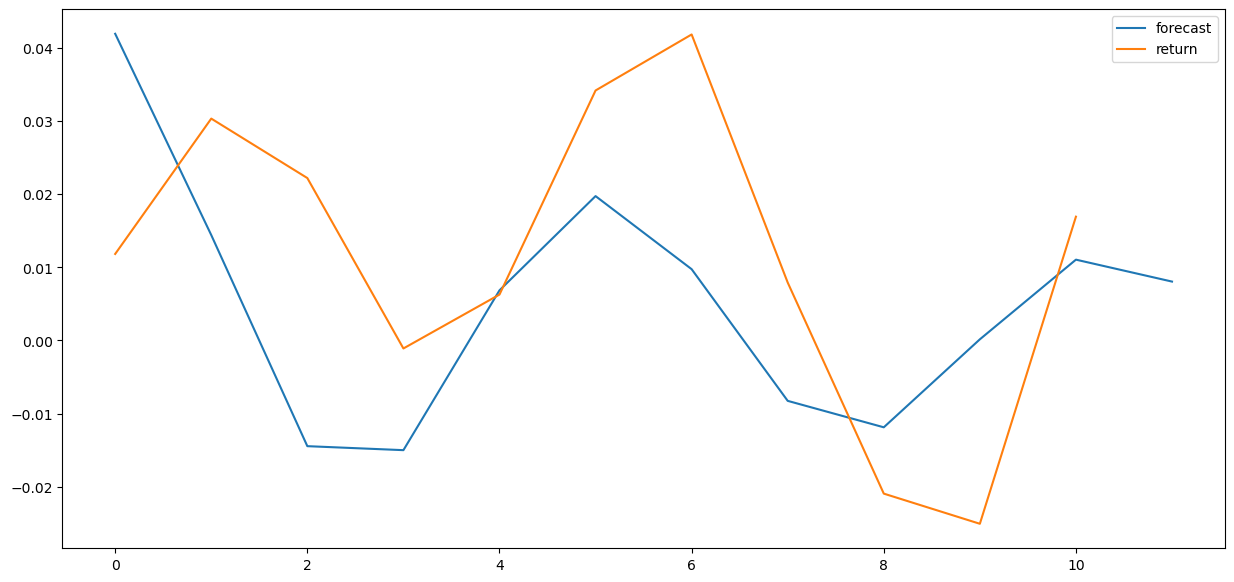

In [18]:
prc=pd.DataFrame(prc)
pdt=pd.DataFrame(pdt)
df=pd.concat([prc,pdt],axis=1).plot(figsize=(15,7))
plt.legend(['forecast','return'])
plt.show()